In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
import math
import os
import matplotlib.cm as cm
import matplotlib
matplotlib.rcParams['animation.writer'] = 'imagemagick'

N_THERMS_PER_MODULE = 24
N_MODULES = 6
N_THERMISTORS = N_THERMS_PER_MODULE*N_MODULES
N_COLORS = 100
COLOR_SCALE = cm.RdYlGn(np.linspace(0, 1, N_COLORS))

MODULE_MARKERS = ['o', 's', '*', '^', 'D', 'P']
MODULE_X_BIAS = 0
MODULE_SPACING = 4

def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [ ]:
data = np.load('084225.npy')[()]

print(data.keys())
data['CellTemperatureRange'].dtype

# set(data['CellTemperatureRange']['argmax0'])

In [13]:
# Read in thermistor data into table. Filter out outliers. Assumes thermistor index is from 0..N_THERMISTORS

N_RECORDS = 100

table_shape = ((N_RECORDS, N_THERMISTORS))
data = np.zeros(table_shape)
for i in range(N_RECORDS):
    module_temps = list(range(6))[::-1]*4
    data_flat = 20 + np.array(module_temps*N_MODULES)*2*i/N_RECORDS + i*40/N_RECORDS
    data[i] = data_flat

# Reject outliers code...
    
min_temp = np.min(data)
max_temp = np.max(data)

In [29]:
max_temp

69.5

In [ ]:
# Obtain data statistics, and filter out outliers

In [17]:
# Mappings to convert thermistor index into position offsets
X_POS_LOOKUP = {}
for i in range(N_THERMS_PER_MODULE):
    X_POS_LOOKUP[i] = np.round(i / (N_THERMS_PER_MODULE-1))
    
Y_POS_LOOKUP = {}
for i in range(N_THERMS_PER_MODULE):
    Y_POS_LOOKUP[i] = i % 6
    
Z_POS_LOOKUP = {}
for i in range(N_THERMS_PER_MODULE):
    Z_POS_LOOKUP[i] = np.round((i % 12)/11.)

In [18]:
# Returns (m, (x,y,z)):
#     m is the marker for the battery module
#     (x,y,z) is the spatial location of thermistor `idx`
#     x-axis going left-right, y-axis going back-front, z-axis going up-down
def convert_therm_idx_to_3d_point(idx):
    module = math.floor(idx / N_THERMS_PER_MODULE)
    module_idx = idx % N_THERMS_PER_MODULE
    
    marker = MODULE_MARKERS[module]
    x = MODULE_X_BIAS + module*(2+MODULE_SPACING) + X_POS_LOOKUP[module_idx]
    y = Y_POS_LOOKUP[module_idx]
    z = Z_POS_LOOKUP[module_idx]
    
    # every other module is rotated 180 degrees inside the pack along the z-axis
    if module % 1 == 0:
        y = 5-y
        x = x+1 if x % 2 == 0 else x-1
    
    return (marker, (x,y,z))

In [ ]:
# Draw battery pack outline

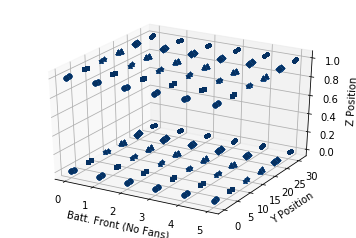

In [23]:
# Plot the 3D scatterplot frames
# Iterate over records and save plots

# Create base subplot figure
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
ax.set_xlabel('Batt. Front (No Fans)')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')

def update(i):
    for j in range(N_THERMISTORS):
        m, (y,x,z) = convert_therm_idx_to_3d_point(j)
        i = int(i)
        temp = data[i][j]
        tmp = int(N_COLORS*(0. + temp - min_temp)/(max_temp-min_temp))
        color_idx = min(N_COLORS-1, tmp)
        if tmp >= N_COLORS: print(tmp)
        c = COLOR_SCALE[N_COLORS-color_idx-1]
        ax.scatter(x, y, z, c=c, marker=m)
    return ax

anim = FuncAnimation(fig, update, frames=np.arange(0, N_RECORDS/10), interval=500)
anim.save('line.gif', dpi=80, writer='imagemagick')
# HTML(anim.to_html5_video())

# plt.colorbar()
# plt.savefig('test.png')
# plt.show()

On frame 0
On frame 1
On frame 2
On frame 3
On frame 4
On frame 5
On frame 6
On frame 7
On frame 8
On frame 9
On frame 10
On frame 11
On frame 12
On frame 13
On frame 14
On frame 15
On frame 16
On frame 17
On frame 18
On frame 19


/home/skoppula/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


On frame 20
On frame 21
On frame 22
On frame 23
On frame 24
On frame 25
On frame 26
On frame 27
On frame 28
On frame 29
On frame 30
On frame 31
On frame 32
On frame 33
On frame 34
On frame 35
On frame 36
On frame 37
On frame 38
On frame 39
On frame 40
On frame 41
On frame 42
On frame 43
On frame 44
On frame 45
On frame 46
On frame 47
On frame 48
On frame 49
On frame 50
On frame 51
On frame 52
On frame 53
On frame 54
On frame 55
On frame 56
On frame 57
On frame 58
On frame 59
On frame 60
On frame 61
On frame 62
On frame 63
On frame 64
On frame 65
On frame 66
On frame 67
On frame 68
On frame 69
On frame 70
On frame 71
On frame 72
On frame 73
On frame 74
On frame 75
On frame 76
On frame 77
On frame 78
On frame 79
On frame 80
On frame 81
On frame 82
On frame 83
On frame 84
On frame 85
On frame 86
On frame 87
On frame 88
On frame 89
On frame 90
On frame 91
On frame 92
On frame 93
On frame 94
On frame 95
On frame 96
On frame 97
On frame 98
On frame 99


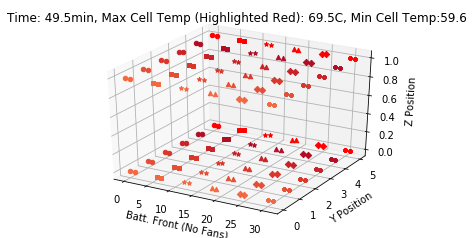

In [40]:
for i in range(N_RECORDS):
    print("On frame", i)
    plt.clf()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlabel('Batt. Front (No Fans)')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    plt.title("Time: " + str(i/2) + "min, Max Cell Temp (Highlighted Red): " + str(max(data[i])) + "C, Min Cell Temp:" + str(min(data[i])))

    for j in range(N_THERMISTORS):
        m, (x,y,z) = convert_therm_idx_to_3d_point(j)
        temp = data[i][j]
        
        tmp = int(N_COLORS*(0. + temp - min_temp)/(max_temp-min_temp))
        color_idx = min(N_COLORS-1, tmp)
        c = COLOR_SCALE[N_COLORS-color_idx-1]
        if temp == max(data[i]):
            c = 'r'
        ax.scatter(x, y, z, c=c, marker=m)

    name = str(i) if len(str(i)) == 2 else '0' + str(i) 
    plt.savefig('figs/temps_' + name + '.png')
    # plt.show()

In [ ]:
# Create line graph